In [1]:
import numpy as np
import sys

sys.path.append('../scripts')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from elements import *

import measurement as me

In [454]:
import matplotlib.pyplot as plt
%matplotlib notebook

## Define typical optomechanical system

In [703]:
omega_c = 5e9*np.pi*2
omega_m = 5e6*np.pi*2

omega_drive = omega_c - 0 * omega_m

a = Mode('a', omega_c)
b = Mode('b', omega_m)

a_inex = Input('ex', a, 0.2e6*np.pi*2, kind = 'drive', omega_drive = omega_drive, bath_temp=10e-1)
a_in0 = Input('0', a, 0.3e6*np.pi*2, kind = 'bath', bath_temp=10e-3)

b_in0 = Input('0', b, 10*np.pi*2, kind = 'bath', bath_temp=10e-3)

g_ab = Coupling(a, b, 1000*1e3*np.pi*2*np.array([1,1]))

sys_om = System([a, b], [b_in0 ,a_in0, a_inex], [g_ab])

In [704]:
#print (sys_om.SMatrix(omega_m))

## Measure mechanical sidebands

In [705]:
a_outex = Output(sys_om, a_inex)

omegas = np.linspace(omega_drive - 1.5*omega_m, omega_drive + 1.5*omega_m, 1000)

spec = [me.spectrum(a_outex,omega) for omega in omegas]

<IPython.core.display.Javascript object>


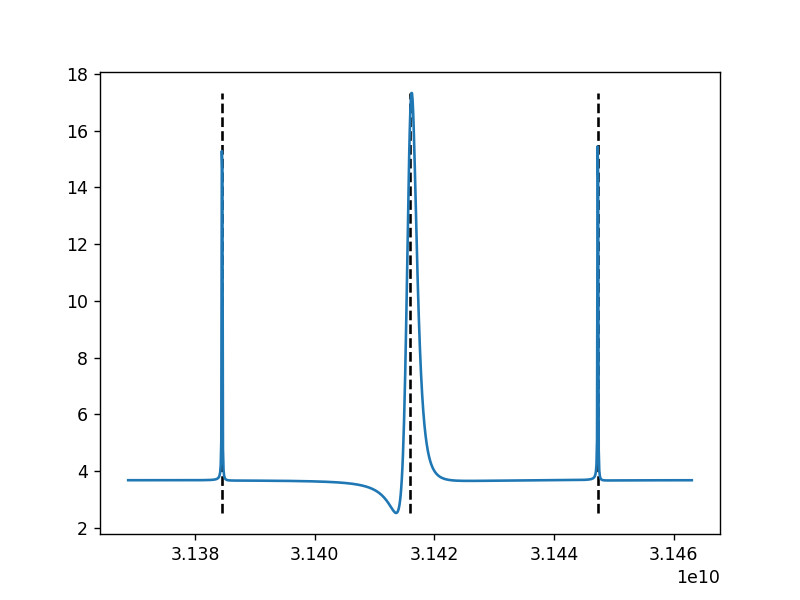

In [706]:
plt.figure()
plt.plot(omegas, spec);

plt.vlines([omega_drive - omega_m, omega_drive, omega_drive + omega_m], min(spec), max(spec), linestyles='--')

In [ ]:
#test